# SI140A Final Project - Phase Transition

Team members:

- Hengyu Ai (aihy2023\<at\>shanghaitech.edu.cn)
- Zebang He (hezb2023\<at\>shanghaitech.edu.cn)
- Sizhe Zhao (zhaoszh2023\<at\>shanghaitech.edu.cn)

Contributions:

- Hengyu Ai: Implement the percolation model
- Zebang He: Implement the acceleration of the Ising model
- Sizhe Zhao: Give out proof in Part II Task A & implement the simulation of the Ising model

## Part I: Percolation

### Problem Description

Using an $n \times n$ grid as a percolation model, we want to find the percolation threshold $p^*$, which is the probability that a site is open, such that the system percolates. A system percolates if there is a path of open sites from the top to the bottom of the grid.

### Solution

`numpy.random.choice` is used to generate random numbers. We first generate a random grid with a given probability $p$.

Then we use breadth-first search to find the connected components of the grid. If there is a connected component that connects the top and bottom of the grid (a full open site), we say the system percolates.

We pick $p$ from $0$ to $1$ and calculate the percolation probability by 5000 randomlly generated $n \times n$ grids. The percolation threshold is the smallest $p$ such that the percolation probability is larger than 0.5.

In [ ]:
import numpy as np

"""
Generate a grid of size 'n' x 'n' with each cell having a probability 'p' of being open.
"""


def generate_grid(n: int, p: float) -> np.ndarray:
    return np.random.choice([0, 1], (n, n), p=[p, 1 - p])


"""
Use Breadth First Search to check if the grid percolates from the top to the bottom.
"""


def check_percolation(grid: np.ndarray) -> bool:
    q = []
    n = grid.shape[0]
    visited = np.zeros((n, n), dtype=bool)
    for i in range(n):
        if grid[i, 0] == 0:
            q.append((i, 0))
            visited[i, 0] = True
    while q:
        x, y = q.pop(0)
        if y == n - 1:
            return True
        for dx, dy in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
            nx, ny = x + dx, y + dy
            if 0 <= nx < n and 0 <= ny < n and grid[nx, ny] == 0 and not visited[nx, ny]:
                q.append((nx, ny))
                visited[nx, ny] = True
    return False


"""
Calculate the probability of percolation using Monte Carlo Simulation.
"""


def calc_percolation_probability(n: int, p: float, num_trials: int) -> float:
    count = 0
    for _ in range(num_trials):
        grid = generate_grid(n, p)
        if check_percolation(grid):
            count += 1
    return count / num_trials


def calc_threshold(n: int, num_trials: int) -> float:
    lo, hi = 0.0, 1.0
    while hi - lo > 1e-6:
        mid = (lo + hi) / 2
        if calc_percolation_probability(n, mid, num_trials) < 0.5:
            lo = mid
        else:
            hi = mid
    return lo


def plot_probability(n: int, num_trials: int, threshold: float) -> None:
    import matplotlib.pyplot as plt
    x = np.linspace(0, 1, 50)
    y = [calc_percolation_probability(n, p, num_trials) for p in x]
    plt.plot(x, y)
    plt.axvline(x=threshold, color='r', linestyle='--')
    plt.xlabel('p')
    plt.ylabel('Percolation Probability')
    plt.title('Percolation Probability vs. p')
    plt.show()


def main():
    num_trials = 5000
    for n in [20, 50, 100]:
        threshold = calc_threshold(n, num_trials)
        print(f"Threshold for n = {n}: {threshold}")
        plot_probability(n, num_trials, threshold)
    


main()

## Part II: Ising Model

## Solution

### Task A

$ \begin{aligned}
P(\sigma_k=+1|\boldsymbol{\sigma}_{-k}) &= \frac{P(\boldsymbol{\sigma}_{-k} \cup \{\sigma_k=+1\})}{P(\boldsymbol{\sigma}_{-k})} \\
&= \frac{P(\boldsymbol{\sigma}_{-k} \cup \{\sigma_k=+1\})}{P(\boldsymbol{\sigma}_{-k} \cup \{\sigma_k=+1\} \cup \boldsymbol{\sigma}_{-k} \cup \{\sigma_k=-1\})} \\
&= \frac{P(\boldsymbol{\sigma}_{-k} \cup \{\sigma_k=+1\})}{P(\boldsymbol{\sigma}_{-k} \cup \{\sigma_k=+1\}) + P(\boldsymbol{\sigma}_{-k} \cup \{\sigma_k=-1\})} \\
&= \frac{\pi_{\boldsymbol{\sigma}_{-k} \cup \{\sigma_k=+1\}}}{\pi_{\boldsymbol{\sigma}_{-k} \cup \{\sigma_k=+1\}} + \pi_{\boldsymbol{\sigma}_{-k} \cup \{\sigma_k=-1\}}} \\
&= \frac{e^{-\beta H(\boldsymbol{\sigma}_{-k} \cup \{\sigma_k=+1\})}}{e^{-\beta H(\boldsymbol{\sigma}_{-k} \cup \{\sigma_k=+1\})} + e^{-\beta H(\boldsymbol{\sigma}_{-k} \cup \{\sigma_k=-1\})}} \\
&= \frac{e^{-\beta (- \sum_{v,w \not\sim k} \sigma_v \sigma_w - \sum_{v \sim k} \sigma_v)}}{e^{-\beta (- \sum_{v,w \not\sim k} \sigma_v \sigma_w - \sum_{v \sim k} \sigma_v)} + e^{-\beta (- \sum_{v,w \not\sim k} \sigma_v \sigma_w + \sum_{v \sim k} \sigma_v)}} \\
&= \frac{e^{\beta (\sum_{v,w \not\sim k} \sigma_v \sigma_w + \sum_{v \sim k} \sigma_v)}}{e^{\beta (\sum_{v,w \not\sim k} \sigma_v \sigma_w + \sum_{v \sim k} \sigma_v)} + e^{\beta (\sum_{v,w \not\sim k} \sigma_v \sigma_w - \sum_{v \sim k} \sigma_v)}} \\
&= \frac{1}{1 + \frac{e^{\beta (\sum_{v,w \not\sim k} \sigma_v \sigma_w - \sum_{v \sim k} \sigma_v)}}{e^{\beta (\sum_{v,w \not\sim k} \sigma_v \sigma_w + \sum_{v \sim k} \sigma_v)}}} \\
&= \frac{1}{1 + e^{\beta (\sum_{v,w \not\sim k} \sigma_v \sigma_w - \sum_{v \sim k} \sigma_v - \sum_{v,w \not\sim k} \sigma_v \sigma_w - \sum_{v \sim k} \sigma_v)}} \\
&= \frac{1}{1 + e^{-2\beta \sum_{v \sim k} \sigma_v}}
\end{aligned} $

$ \begin{aligned}
P(\sigma_k=-1|\boldsymbol{\sigma}_{-k}) &= \frac{P(\boldsymbol{\sigma}_{-k} \cup \{\sigma_k=+1\})}{P(\boldsymbol{\sigma}_{-k})} \\
&= \frac{P(\boldsymbol{\sigma}_{-k} \cup \{\sigma_k=-1\})}{P(\boldsymbol{\sigma}_{-k} \cup \{\sigma_k=+1\} \cup \boldsymbol{\sigma}_{-k} \cup \{\sigma_k=-1\})} \\
&= \frac{P(\boldsymbol{\sigma}_{-k} \cup \{\sigma_k=-1\})}{P(\boldsymbol{\sigma}_{-k} \cup \{\sigma_k=+1\}) + P(\boldsymbol{\sigma}_{-k} \cup \{\sigma_k=-1\})} \\
&= \frac{\pi_{\boldsymbol{\sigma}_{-k} \cup \{\sigma_k=-1\}}}{\pi_{\boldsymbol{\sigma}_{-k} \cup \{\sigma_k=+1\}} + \pi_{\boldsymbol{\sigma}_{-k} \cup \{\sigma_k=-1\}}} \\
&= \frac{e^{-\beta H(\boldsymbol{\sigma}_{-k} \cup \{\sigma_k=-1\})}}{e^{-\beta H(\boldsymbol{\sigma}_{-k} \cup \{\sigma_k=+1\})} + e^{-\beta H(\boldsymbol{\sigma}_{-k} \cup \{\sigma_k=-1\})}} \\
&= \frac{e^{-\beta (- \sum_{v,w \not\sim k} \sigma_v \sigma_w + \sum_{v \sim k} \sigma_v)}}{e^{-\beta (- \sum_{v,w \not\sim k} \sigma_v \sigma_w - \sum_{v \sim k} \sigma_v)} + e^{-\beta (- \sum_{v,w \not\sim k} \sigma_v \sigma_w + \sum_{v \sim k} \sigma_v)}} \\
&= \frac{e^{\beta (\sum_{v,w \not\sim k} \sigma_v \sigma_w - \sum_{v \sim k} \sigma_v)}}{e^{\beta (\sum_{v,w \not\sim k} \sigma_v \sigma_w + \sum_{v \sim k} \sigma_v)} + e^{\beta (\sum_{v,w \not\sim k} \sigma_v \sigma_w - \sum_{v \sim k} \sigma_v)}} \\
&= \frac{1}{1 + \frac{e^{\beta (\sum_{v,w \not\sim k} \sigma_v \sigma_w + \sum_{v \sim k} \sigma_v)}}{e^{\beta (\sum_{v,w \not\sim k} \sigma_v \sigma_w - \sum_{v \sim k} \sigma_v)}}} \\
&= \frac{1}{1 + e^{\beta (\sum_{v,w \not\sim k} \sigma_v \sigma_w + \sum_{v \sim k} \sigma_v - \sum_{v,w \not\sim k} \sigma_v \sigma_w + \sum_{v \sim k} \sigma_v)}} \\
&= \frac{1}{1 + e^{2\beta \sum_{v \sim k} \sigma_v}}
\end{aligned} $

### Task B & C

In this part, we implement the simulation of the Ising model. We first generate a random $n \times n$ grid with randomly assigned spins. Then we iterate through all the spins and calculate the energy change if we flip the spin. If the energy change is negative or the probability of flipping the spin is larger than a random number, we flip the spin.

Then we find the simulation is a CPU-bound task, the nested loop in the simulation is the most time-consuming part. And because of the GIL in Python, we cannot use multi-threading to speed up the simulation.

So we introduced taichi to accelerate the simulation. We use the `ti.field` to represent the spins and the `ti.kernel` to update the spins.

#### Original

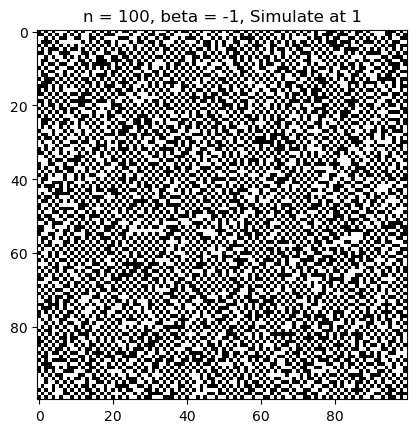

KeyboardInterrupt: 

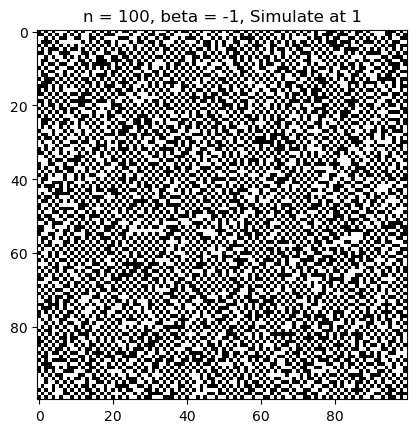

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from IPython.display import clear_output
from time import sleep


class IsingModel:
    def __init__(self, n, beta):
        self.n = n
        self.beta = beta
        self.lattice = np.random.choice([-1, 1], size=(n, n))

    def simulate(self):
        old_lattice = self.lattice

        for i in range(self.n):
            for j in range(self.n):
                x = 0
                if i - 1 >= 0:
                    x += old_lattice[i - 1, j]
                if i + 1 < self.n:
                    x += old_lattice[i + 1, j]
                if j - 1 >= 0:
                    x += old_lattice[i, j - 1]
                if j + 1 < self.n:
                    x += old_lattice[i, j + 1]

                if np.random.random() <= 1 / (1 + np.exp(-2 * self.beta * x)):
                    self.lattice[i, j] = 1
                else:
                    self.lattice[i, j] = -1

    def show(self, n):
        clear_output(wait=True)
        cmap = ListedColormap(["0", "1"])
        plt.imshow(model.lattice, cmap=cmap)
        plt.title(f"n = {self.n}, beta = {self.beta}, Simulate at {n}")
        # plt.show()
        display(plt.gcf())


for n, betas in [(100, [-1, 0, 0.441, 0.8]), (300, [-5, 0.2, 0.441, 0.6])]:
    for beta in betas:
        model = IsingModel(n, beta)
        model.show(0)
        for i in range(1000):
            model.simulate()
            if i % 500 == 0:
                sleep(0.01)
                model.show(i+1)

### Task B & C Result

1. **Parameter $\beta$**:
    - $\beta$ represents the inverse of the temperature
    - At high temperatures (low $\beta$), thermal fluctuations dominate, and the spins in the lattice are randomly oriented, resulting in a disordered phase with no net magnetization.
    - At low temperatures (high $\beta$), the interaction between neighboring spins becomes significant, leading to an ordered phase where spins align either up or down, resulting in a non-zero net magnetization.

2. **Lattice Size $n$**:
    - The size of the lattice ($n \times n$) affects the critical temperature at which the phase transition occurs.
    - In smaller lattices, finite-size effects can smooth out the phase transition, making it less sharp compared to larger lattices.
    - As the lattice size increases, the phase transition becomes more pronounced, and the critical temperature approaches the theoretical value for an infinite lattice.

### Observations from Simulations

- For small values of $\beta$ (high temperature), the lattice remains disordered with no clear pattern of spin alignment.
- As $\beta$ increases (temperature decreases), clusters of aligned spins start to form, indicating the onset of the phase transition.
- At a critical value of $\beta$, a sharp transition occurs where the entire lattice aligns, resulting in a significant increase in magnetization.
- Larger lattice sizes ($n$) exhibit a more distinct phase transition, with the critical value of $\beta$ becoming more apparent.

#### Taichi + CUDA + Branch Reduce

KeyboardInterrupt: 

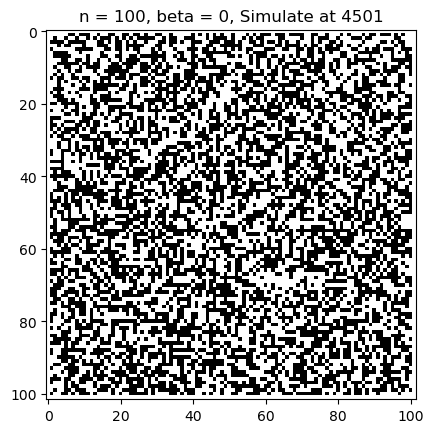

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from IPython.display import clear_output
from time import sleep, time
import taichi as ti

ti.init(arch=ti.cuda)

@ti.data_oriented
class IsingModel:
    def __init__(self, n, beta):
        self.n = n
        self.beta = beta
        self.lattice = ti.field(dtype=ti.i32, shape=(n+2, n+2))
        self.initialize_lattice()

    @ti.kernel
    def initialize_lattice(self):
        self.lattice.fill(0)
        for i in range(1, self.n+1):
            for j in range(1, self.n+1):
                self.lattice[i, j] = ti.random(ti.i32) * 2 - 1

    @ti.kernel
    def simulate(self):
        ti.loop_config(parallelize=8, block_dim=16)
        for i in range(1, self.n+1):
            # ti.loop_config(parallelize=8, block_dim=16)
            for j in range(1, self.n+1):
                x = self.lattice[i - 1, j]
                x += self.lattice[i + 1, j]
                x += self.lattice[i, j - 1]
                x += self.lattice[i, j + 1]

                if ti.random() <= 1 / (1 + ti.exp(-2 * self.beta * x)):
                    self.lattice[i, j] = 1
                else:
                    self.lattice[i, j] = -1

    def show(self, n):
        clear_output(wait=True)
        cmap = ListedColormap(["0", "1"])
        plt.imshow(self.lattice.to_numpy(), cmap=cmap)
        plt.title(f"n = {self.n}, beta = {self.beta}, Simulate at {n}")
        display(plt.gcf())


# model.show(0)
startTime = time()
for n, betas in [(100, [-1, 0, 0.441, 0.8]), (300, [-5, 0.2, 0.441, 0.6])]:
    for beta in betas:
        model = IsingModel(n, beta)
        for i in range(10000):
            model.simulate()
            if i % 500 == 0:
                model.show(i+1)
                # print("500 Epoch time elapsed: ", time() - startTime)
                startTime = time()
model.show(0)
print("Simluation time elapsed: ", time() - startTime)
        

#### Taichi + CUDA

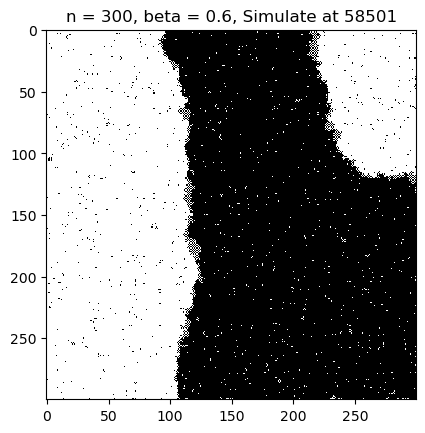

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from IPython.display import clear_output
from time import sleep, time
import taichi as ti

ti.init(arch=ti.cuda)

@ti.data_oriented
class IsingModel:
    def __init__(self, n, beta):
        self.n = n
        self.beta = beta
        self.lattice = ti.field(dtype=ti.i32, shape=(n, n))
        self.initialize_lattice()

    @ti.kernel
    def initialize_lattice(self):
        for i, j in self.lattice:
            self.lattice[i, j] = ti.random(ti.i32) * 2 - 1

    @ti.kernel
    def simulate(self):
        for i, j in self.lattice:
            x = 0
            if i - 1 >= 0:
                x += self.lattice[i - 1, j]
            if i + 1 < self.n:
                x += self.lattice[i + 1, j]
            if j - 1 >= 0:
                x += self.lattice[i, j - 1]
            if j + 1 < self.n:
                x += self.lattice[i, j + 1]

            if ti.random() <= 1 / (1 + ti.exp(-2 * self.beta * x)):
                self.lattice[i, j] = 1
            else:
                self.lattice[i, j] = -1

    def show(self, n):
        clear_output(wait=True)
        cmap = ListedColormap(["0", "1"])
        plt.imshow(self.lattice.to_numpy(), cmap=cmap)
        plt.title(f"n = {self.n}, beta = {self.beta}, Simulate at {n}")
        display(plt.gcf())


startTime = time()
# for n, betas in [(100, [-1, 0, 0.441, 0.8]), (300, [-5, 0.2, 0.441, 0.6])]:
for n, betas in [(300, [0.6])]:
    for beta in betas:
        model = IsingModel(n, beta)
        for i in range(100000):
            model.simulate()
            if i % 500 == 0:
                model.show(i+1)
                # print("500 Epoch time elapsed: ", time() - startTime)
                startTime = time()
print("Simluation time elapsed: ", time() - startTime)
        